In [11]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
model = pickle.load(open('random_forest_completion.p', 'rb')) # load the model

joblib test

In [13]:
joblib.dump(model, '/Users/jeremymiller/Desktop/rf_test.joblib') 

['/Users/jeremymiller/Desktop/rf_test.joblib']

In [ ]:
# model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=20, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

In [3]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)


In [4]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')
y_test = y_test['module_not_completed']
numeric_cols = ['num_of_prev_attempts', 'studied_credits',
'clicks_per_day', 'pct_days_vle_accessed','max_clicks_one_day',
'first_date_vle_accessed', 'avg_score', 'avg_days_sub_early', 'days_early_first_assessment',
'score_first_assessment']
# fill and scale
X_train.fillna(value = 0, inplace = True)
X_train = scale_subset(X_train, numeric_cols)
X_test.fillna(value = 0, inplace = True)
X_test = scale_subset(X_test, numeric_cols)


/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [5]:
# model.fit(X_train, y_train)

In [6]:
predictions = model.predict(X_test)

In [7]:
recall = recall_score(y_test, predictions)
recall

0.851767588379419

In [8]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.8805731491560728

In [9]:
probas = model.predict_proba(X_test)[:, :1]
tprs, fprs, thresh = roc_curve(y_test, probas)

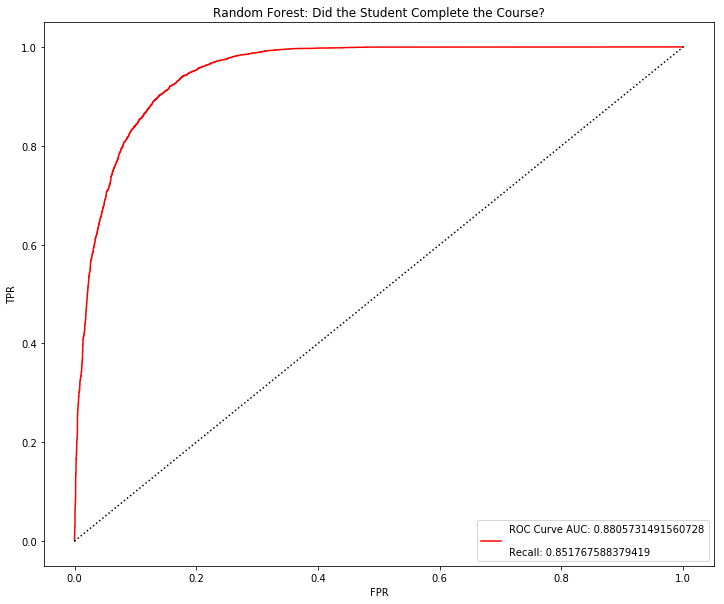

In [10]:
plt.figure(figsize=(12,10))
plt.plot(fprs, tprs, 
    label='ROC Curve AUC: {}\n\nRecall: {}'.format(roc_auc, recall),
    color='red')
plt.plot([0,1],[0,1], 'k:')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Random Forest: Did the Student Complete the Course?")
plt.show()

# Which features are most important?

In [11]:
model.feature_importances_

array([0.00712215, 0.01502271, 0.1496344 , 0.16865928, 0.07370545,
       0.03775269, 0.13468622, 0.0727018 , 0.10664541, 0.06977803,
       0.00931259, 0.00344726, 0.00686327, 0.00290231, 0.02056674,
       0.00520104, 0.        , 0.00490875, 0.00469827, 0.00730099,
       0.        , 0.00698754, 0.        , 0.00303527, 0.00205502,
       0.00318897, 0.00233323, 0.00337808, 0.00369433, 0.0026698 ,
       0.00322267, 0.00292554, 0.00299277, 0.0033843 , 0.00261929,
       0.        , 0.00382617, 0.00948918, 0.00088651, 0.00054356,
       0.        , 0.00385267, 0.0035504 , 0.00344836, 0.00323125,
       0.00319044, 0.00325471, 0.00335606, 0.00312219, 0.00302026,
       0.0017978 , 0.00610434, 0.00043384, 0.        , 0.00349606,
       0.        ])

In [12]:
feat_imp = list(list(model.feature_importances_))
features = list(X_test.columns)

In [13]:
coef_dict = c.OrderedDict((zip(feat_imp, features)))

In [14]:
sorted(coef_dict.items(), reverse=True)

[(0.168659277226016, 'pct_days_vle_accessed'),
 (0.1496344025323965, 'clicks_per_day'),
 (0.13468622380900439, 'avg_score'),
 (0.1066454144038234, 'days_early_first_assessment'),
 (0.07370544784658087, 'max_clicks_one_day'),
 (0.07270180336086225, 'avg_days_sub_early'),
 (0.06977802759021884, 'score_first_assessment'),
 (0.03775269192326649, 'first_date_vle_accessed'),
 (0.020566742354566413, 'code_module_FFF'),
 (0.01502270700751527, 'studied_credits'),
 (0.009489179936045398, 'highest_education_Lower Than A Level'),
 (0.009312592125322362, 'code_module_BBB'),
 (0.007300994508562841, 'code_presentation_2014J'),
 (0.0071221490320816025, 'num_of_prev_attempts'),
 (0.006987536390755106, 'gender_M'),
 (0.006863271277430469, 'code_module_DDD'),
 (0.0061043368637230914, 'age_band_35-55'),
 (0.005201040389959182, 'code_module_GGG'),
 (0.004908751608771795, 'code_presentation_2013J'),
 (0.004698274720330768, 'code_presentation_2014B'),
 (0.0038526659346252395, 'imd_band_10-20'),
 (0.003826172